In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import pylint
from matplotlib import pyplot as plt
import fastparquet

Matplotlib is building the font cache; this may take a moment.


In [2]:
with open("charts1995-2000.parquet","rb") as file:
    df = pd.read_parquet(file,engine="fastparquet")

In [3]:
def get_range(idx):
    dates = idx.get_level_values("date")
    return dates.min(),dates.max()

In [4]:
def expand_artists(df):
    localdf = df.copy()
    temp = localdf["artist"].str.split('&',expand=True)
    localdf.insert(value=temp.iloc[:,0],column="artist1",loc=1)
    localdf.insert(value=temp.iloc[:,1],column="artist2",loc=2)
    localdf.insert(value=temp.iloc[:,2],column="artist3",loc=3)
    localdf = localdf.drop(columns="artist")
    temp = localdf["artist1"].str.split("Featuring",expand=True)
    localdf.insert(value=temp.iloc[:,1],column="feature(s)",loc=4)
    localdf["artist1"] = temp.iloc[:,0]
    return localdf
    

In [5]:
def top10(df,col):
    local = df.copy()
    return local[col].value_counts()[:10]

In [10]:
df = expand_artists(df)

In [16]:
artists10 = top10(df,"artist1")
songs10 = top10(df,"song")
df_rows = df.loc[df['song'].isin(songs10.index)]

ValueError: x and y must have same first dimension, but have shapes (375,) and (43,)

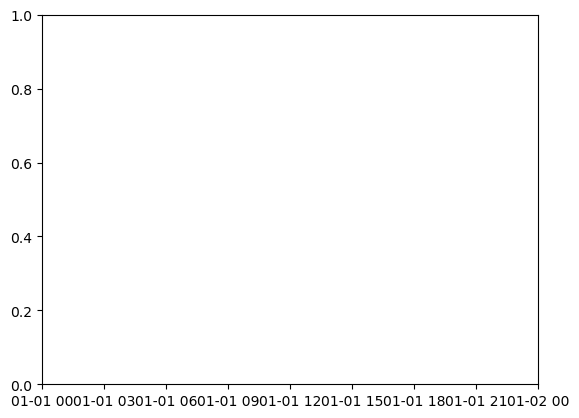

In [21]:
axis_x = [val for val in df_rows.index.get_level_values(level='date').sort_values()]
for song in songs10.index:
    label = song
    axis_y = [pos for pos in df.loc[df['song']==song].index.get_level_values(level='position')]
    plt.plot(axis_x,axis_y)
    break


In [8]:
def max_weeks(df):
    local = df.copy()
    sorted = local.groupby("song")["wks_on_chart"].max().sort_values(ascending=False)[:10]
    local = local.loc[local["song"].isin(sorted.index)]
    local = local.sort_values(by="date")
    local = local.drop_duplicates(subset="song")
    return local
    

In [9]:
max_weeks(df)

song  \
date       position                                        
1995-11-04 46.0              Macarena (Bayside Boys Mix)   
           44.0                                  Missing   
           16.0                               Run-Around   
1996-11-30 85.0                         Barely Breathing   
           61.0      Foolish Games/You Were Meant For Me   
1997-07-26 18.0                            How Do I Live   
1997-11-15 15.0                     I Don't Want To Wait   
1997-12-20 31.0                     How's It Going To Be   
           12.0                       Truly Madly Deeply   
1998-02-14 45.0                                Too Close   

                                      artist  award  last_week  peak_pos  \
date       position                                                        
1995-11-04 46.0                  Los Del Rio  False       52.0      45.0   
           44.0      Everything But The Girl   True       60.0      44.0   
           16.0               Blues Traveler  False       16.0       8.0   
1996-11-30 85.0                 Duncan Sheik   True        NaN      85.0   
           61.0                        Jewel   True        NaN      61.0   
1997-07-26 18.0                  LeAnn Rimes   True       22.0      18.0   
1997-11-15 15.0                   Paula Cole   True       15.0      15.0   
1997-12-20 31.0              Third Eye Blind   True       31.0      31.0   
           12.0                Savage Garden   True       17.0      12.0   
1998-02-14 45.0                         Next   True        NaN      45.0   

                     wks_on_chart  
date       position                
1995-11-04 46.0              10.0  
           44.0              13.0  
           16.0              33.0  
1996-11-30 85.0               1.0  
           61.0               1.0  
1997-07-26 18.0               6.0  
1997-11-15 15.0               3.0  
1997-12-20 31.0               3.0  
           12.0               3.0  
1998-02-14 45.0               1.0

In [57]:
pos_sum1.index[:10]

Index(['Shania Twain', 'Garbage', 'Deborah Cox', 'Backstreet Boys',
       'Collective Soul', 'Dixie Chicks', 'Faith Hill',
       'The Smashing Pumpkins', 'Bush', 'Hootie '],
      dtype='object', name='artist1')

In [66]:
# search = '|'.join(list(pos_sum1.index[:10]))
# search
top_entries = new_df.loc[new_df["artist1"].isin(pos_sum1.index[:10])]

In [129]:
def get_normalized(df):
    local = df.copy()
    local = local.sort_values(by="date")
    local = local.groupby("song")["artist1"].unique()
    return local.list.flatten

In [130]:
p = get_normalized(new_df)
p
# pd.DataFrame(pairs)

NameError: name 'ArrowDtype' is not defined